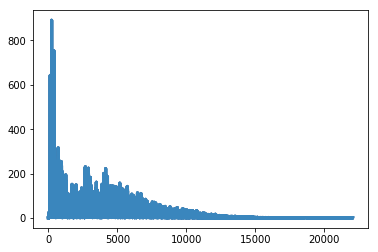

In [13]:
import numpy
import thinkdsp
import thinkplot

short_pop = thinkdsp.read_wave('short_pops.wav')

spectrum = short_pop.make_spectrum()
spectrum.plot()
thinkplot.show()